In [1]:
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["text.usetex"] = False

In [2]:
from importlib import reload
import nbimporter
from collections import Counter
import functions_readbedfiles, functions_plot
from functions_plot import create_data_traintest, create_data4T_SNE
from functions_readbedfiles import readJsonFile, readFiles2Vector, writeJsonFile, convertMat2document, readJsonFile
from representations_regionset2vec import document_embedding_avg
import glob
import pandas as pd
import numpy as np
import time
import copy
import gc
import datetime

Importing Jupyter notebook from functions_readbedfiles.ipynb
Importing Jupyter notebook from functions_ailist.ipynb
Importing Jupyter notebook from functions_plot.ipynb
Importing Jupyter notebook from representations_regionset2vec.ipynb


In [15]:
import json
from gensim.models import Word2Vec
import umap
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib.font_manager as font_manager
import colorsys
from multiprocessing import Pool


In [8]:
font = matplotlib.font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=20)

In [9]:
def initialization(clas_type, label, path_train, path_test, path_universe, path_mat, meta_data, sample_of_interest, path_w2v_model):
    path_train = path_train.format(clas_type)
    path_test = path_test.format(clas_type)
    path_universe = path_universe.format(clas_type)
    path_mat = path_mat
    meta_data = pd.read_csv(meta_data.format(clas_type))
    meta_data = meta_data.loc[meta_data[label].isin(sample_of_interest)][['Experiment_ID', label]]
    model = Word2Vec.load(path_w2v_model.format(clas_type))
    
    return path_train, path_test, path_universe, path_mat, meta_data, model

# Read data

In [10]:
i = 0

In [11]:
clas_types = ['antibody', 'cell', 'tissue']
labels = ['antibody', 'cell line', 'tissue']
sample_of_interest = [['h3k27ac', 'h3k4me3', 'h3k27me3', 'h3k4me1', 'h3k36me3', 'h3k9me3', 'h3k4me2'],
                     ['k562', 'mcf7', 'hek293', 'a549', 'hepg2', 'hct116','lovo', 'gm12878', 'lncap','hela'],
                     ['liver', 'peripheral blood', 'primary prostate cancer', 'blood', 'breast','bone marrow', 'kidney']
                     ]
label = labels[i]
clas_type = clas_types[i]

In [12]:
results = pd.DataFrame(columns = ['dataset','representation',  'pca', 'f1'])

In [21]:
path_train = '/project/shefflab/www/papers/region_embedding/{}dataset/train/*'
path_test = '/project/shefflab/www/papers/region_embedding/{}dataset/test/*'
path_universe = './Representations/{}/'
path_mat = '/project/shefflab/data/ChIP-Atlas/term_doc_mat/'
meta_data = './meta_data/meta_data_{}.csv'
path_w2v_model = './region_embedding_models/word2vec_{}.model'
output_folder = './umap_plots_classification/'

In [17]:
path_train, path_test, path_universe, path_mat, meta_data, model = initialization(clas_type, label, path_train, path_test, path_universe, path_mat, meta_data, sample_of_interest[i], path_w2v_model)


2777
2777 2777
695 695
2777
2777 2777
695 695
CPU times: user 16min 23s, sys: 20.7 s, total: 16min 44s
Wall time: 17min 31s


<Figure size 2880x1800 with 0 Axes>

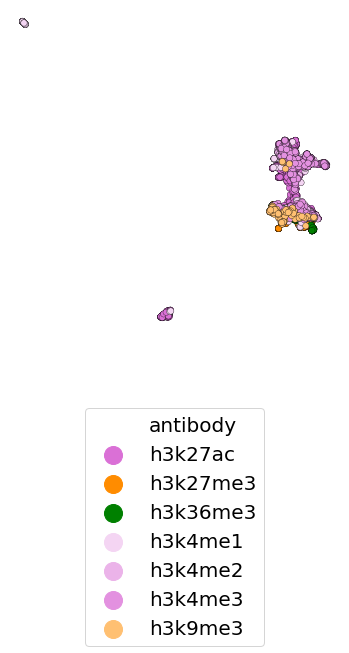

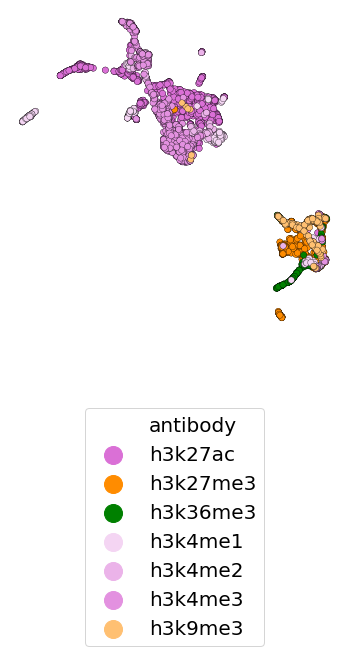

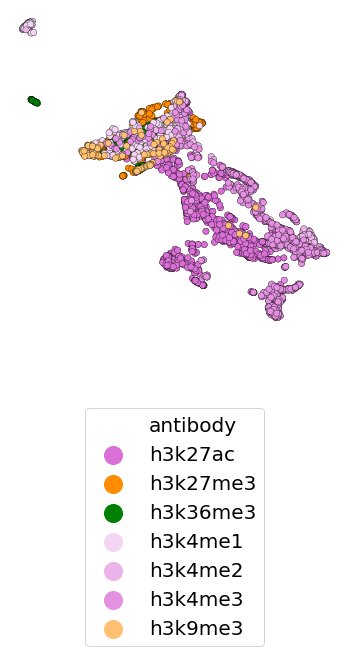

In [20]:
%%time

plt.figure(figsize=(40, 25))
i_list = -1

path_univ = sorted(glob.glob(path_universe + "*"))[-1:][0]
train_files = readJsonFile(path_mat + path_univ.split('/')[-1].replace('.', '-')+'_train.json')
test_files = readJsonFile(path_mat + path_univ.split('/')[-1].replace('.', '-')+'_test.json')
print(len(train_files))

X_train, y_train = create_data4T_SNE(train_files, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')
print(len(X_train), len(y_train))

X_test, y_test = create_data4T_SNE(test_files, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')
print(len(X_test), len(y_test))

tsnefig_umap =  UMAP_plot(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), label, 100, (clas_type+'_universe_umap.svg'), 'Union', output_folder)




document_json_train = '/project/shefflab/data/ChIP-Atlas/term_doc_mat/document_{}_universe-txt_train.json'.format(clas_type)
with open(document_json_train, 'r') as j:
    document_Embedding_train =  json.loads(j.read())
    
document_json_test = '/project/shefflab/data/ChIP-Atlas/term_doc_mat/document_{}_universe-txt_test.json'.format(clas_type)
with open(document_json_test, 'r') as j:
    document_Embedding_test =  json.loads(j.read())
    
document_Embedding_avg_train = document_embedding_avg(document_Embedding_train, model)
document_Embedding_avg_test = document_embedding_avg(document_Embedding_test, model)

X_train, y_train = create_data4T_SNE(document_Embedding_avg_train, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')
X_test, y_test = create_data4T_SNE(document_Embedding_avg_test, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')

tsnefig_umap = UMAP_plot(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), label, 100, (clas_type +'_embedding_umap.svg'), 'RegionSet2vec', output_folder)



path_univ = sorted(glob.glob(path_universe + "*"))[2:3][0]
train_files = readJsonFile(path_mat + path_univ.split('/')[-1].replace('.', '-')+'_train.json')
test_files = readJsonFile(path_mat + path_univ.split('/')[-1].replace('.', '-')+'_test.json')
print(len(train_files))
X_train, y_train = create_data4T_SNE(train_files, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')
print(len(X_train), len(y_train))

X_test, y_test = create_data4T_SNE(test_files, (meta_data.loc[(meta_data[label] !='none') & (meta_data[label] !='nan') & (meta_data[label].notna())]), label, 0, 'Experiment_ID')
print(len(X_test), len(y_test))


tsnefig_umap = UMAP_plot(np.concatenate([X_train, X_test]), np.concatenate([y_train, y_test]), label, 100, (clas_type+'_500-kbp_umap.svg'), 'Tf_idf (500-kbp)', output_folder)



In [18]:
def UMAP_plot(data_X, y, title, nn, filename, plottitle, output_folder):

    np.random.seed(42)
    dp = 300
    fontname = 'Arial'
    font = matplotlib.font_manager.FontProperties(family= fontname,
                                   weight='bold',
                                   style='normal', size=20)
    
    ump = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric=  'euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=nn, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

    ump.fit(data_X) 
    ump_data = pd.DataFrame(ump.transform(data_X)) 


    ump_data = pd.DataFrame({'UMAP 1':ump_data[0],
                            'UMAP 2':ump_data[1],
                            title:y})
    plt = matplotlib.pyplot
#     print(list(ump_data))
    fig, ax = plt.subtots(figsize=(6,6))

    plate =(sns.color_palette("husl", n_colors=len(set(y))))
#     plate.reverse()
    
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                  hue=title,
#                  style=title,
                    s= 20,
                         palette = plate,# sns.color_palette('coolwarm', n_colors=len(set(y))), 
#                          prop=font,
                         legend=None,
#                          markers= markers,
                    edgecolor='black',
#                     alpha=0.7,
                    linewidth=0.2,
#                 sizes=(100, 900),
                  data=ump_data.sort_values(by = title),
                    rasterized=True)


    ax.axis('off')
    fig.savefig(output_folder + filename, format = 'svg', dpi=dp)
    
    
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
              hue=title,
#              style=title,
                s= 20,
                     palette = plate,
#                          prop=font,
#                          legend='full',
#                      markers= markers,
                edgecolor='black',
#                     alpha=0.5,
                linewidth=0.1,
#             sizes=(100, 900),
              data=ump_data.sort_values(by = title), rasterized=True)


    handles, labels = ax.get_legend_handles_labels()
    
    lgd = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.2), fontsize =  20, markerscale=3, edgecolor = 'black')
    text = plt.text(-0.2,1.05, "", transform=ax.transAxes)

    fig.savefig(output_folder +'legend_'+filename+'.svg', bbox_extra_artists=(lgd, text), bbox_inches='tight',format = 'svg', dpi=dp)
 
    
    return fig

# For antibody

In [22]:
def UMAP_plot(data_X, y, title, nn, filename, plottitle,output_folder ):

    dp = 300
    markerha = [ "o" , "o", 'o', 'o']
    np.random.seed(42)
    rep = markerha[0]
    act = markerha[1]
    tran = markerha[2]
    kn = markerha[3]
    fontname = 'Arial Rounded MT Bold'
    markers ={
               "h2ak5ac": kn, "h2ak9ac": kn, 
              "h2bk5ac": kn, "h2bk15ac": kn, "h2bk120ac": kn, 'h2az': kn,
              
              "h3k4me1": act, "h3k4me2":act, "h3k4me3":act, "h3k4ac": kn,
              "h3k9me3": rep, "h3k9ac":act,
              "h3k23ac": kn,
              "h3k27ac": act, "h3k27me3":rep, 
              "h3k36me3": tran, 
              "h3k79me1":tran, "h3k79me2": tran, "h3k79me3":rep,
              
              "h4k8ac": kn, "h4k91ac": kn , 
              "h4k20me1":tran, "h4k20me2": kn, "h4k20me3" : kn}
    
    orch = (sns.light_palette("orchid", 12))
    org = (sns.light_palette("darkorange", 3))
    rep1 = org[1]
    rep2 = org[2]
    act1 = orch[2]
    act2 = orch[5]
    act3 = orch[8]
    act4 = orch[11]
    tran1 = 'green'
    kn1 = 'black'

    colors ={
              "h2ak5ac": kn1, "h2ak9ac": kn1, 
              "h2bk5ac": kn1, "h2bk15ac": kn1, "h2bk120ac": kn1, 'h2az': kn1,

              "h3k4me1": act1, "h3k4me2":act2, "h3k4me3":act3, "h3k4ac": kn1,
              "h3k9me3": rep1, "h3k9ac":act1,
              "h3k23ac": kn1,
              "h3k27ac": act4, "h3k27me3":rep2, 
              "h3k36me3": tran1, 
              "h3k79me1":tran1, "h3k79me2": tran1, "h3k79me3":rep1,

              "h4k8ac": kn1, "h4k91ac": kn1 , 
            "h4k20me1":tran1, "h4k20me2": kn1, "h4k20me3" : kn1}

    font = matplotlib.font_manager.FontProperties(family= fontname,
                                   weight='bold',
                                   style='normal', size=20)
    
    ump = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric=  'euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=nn, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

    ump.fit(data_X) 
    ump_data = pd.DataFrame(ump.transform(data_X)) 


    ump_data = pd.DataFrame({'UMAP 1':ump_data[0],
                            'UMAP 2':ump_data[1],
                            title:y})
    plt = matplotlib.pyplot
#     print(list(ump_data))
    fig, ax = plt.subplots(figsize=(6,6))
#     plt.fig(figsize=(40, 25))
#     plate = sns.color_palette("hls", n_colors=len(set(y)))
    plate =(sns.color_palette("husl", n_colors=len(set(y))))
#     plate.reverse()
    
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                  hue=title,
                 style=title,
                    s= 40,
                         palette = colors,# sns.color_palette('coolwarm', n_colors=len(set(y))), 
#                          prop=font,
                         legend=None,
                         markers= markers,
                    edgecolor='black',
#                     alpha=0.7,
                    linewidth=0.1,
#                 sizes=(100, 900),
                  data=ump_data.sort_values(by = title),
                    rasterized=True)

    
    ax.axis('off')
    fig.savefig(output_folder + filename, format = 'svg', dpi=dp)
    
    
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
              hue=title,
             style=title,
                s= 40,
                     palette = colors,
#                          prop=font,
#                          legend='full',
                     markers= markers,
                edgecolor='black',
#                     alpha=0.7,
                linewidth=0.3,
#             sizes=(100, 900),
              data=ump_data.sort_values(by = title), rasterized=True)

    clrs= ['darkorange', 'orchid','green']

    handles, labels = ax.get_legend_handles_labels()

    lgd = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.2), fontsize =  20, markerscale=3)
    text = plt.text(-0.2,1.05, "", transform=ax.transAxes)  

    fig.savefig(output_folder + 'legend_'+filename+'.svg', bbox_extra_artists=(lgd, text), bbox_inches='tight',format = 'svg', dpi=dp)

    return fig